<a href="https://colab.research.google.com/github/MukeshMishraReloaded/Intro-to-ML-models/blob/main/IntroToMLandNN_17June2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/1dEeOvqYAWGXL5QsGlMPbidoNa87DNZag?usp=sharing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

!gdown 1dLOPwh01o3k8p_hK633ixhD1ehz6nNWk
df = pd.read_csv("/content/spiral.csv")
df.head()

Downloading...
From: https://drive.google.com/uc?id=1dLOPwh01o3k8p_hK633ixhD1ehz6nNWk
To: /content/spiral.csv
100% 12.9k/12.9k [00:00<00:00, 38.1MB/s]


,x1,x2,y
0,0.000000,0.000000,0
1,-0.000650,0.010080,0
2,0.009809,0.017661,0
3,0.007487,0.029364,0
4,-0.000027,0.040404,0


In [ ]:
df.shape

(300, 3)

In [ ]:
df.count()

x1    300
x2    300
y     300
dtype: int64

In [ ]:
df['y'].value_counts() #unique()

0    100
1    100
2    100
Name: y, dtype: int64

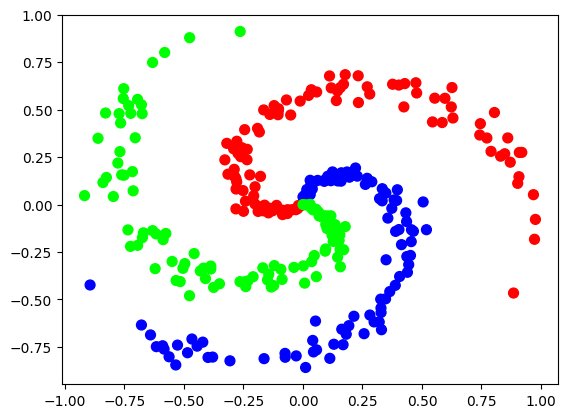

In [ ]:
#plt.scatter(df["x1"], df["x2"], c=df["y"], s=50, cmap=plt.cm.Spectral)
plt.scatter(df["x1"], df["x2"], c=df["y"], s=50, cmap=plt.cm.brg)
plt.show()

In [ ]:
X = df
X = X.drop('y',axis=1).to_numpy()
y = df['y'].to_numpy()#.reshape(y.shape[0],1)
print(X.shape)
print(y.shape)

(300, 2)
(300,)


###What model to use ?

###Linear Model ???

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

#X = StandardScaler().fit_transform(X)
clf = LogisticRegression(random_state=0).fit(X, y)
y_pred = clf.predict(X)

target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y, y_pred, target_names=target_names, digits=2))

              precision    recall  f1-score   support

     class 0       0.52      0.50      0.51       100
     class 1       0.57      0.56      0.56       100
     class 2       0.48      0.50      0.49       100

    accuracy                           0.52       300
   macro avg       0.52      0.52      0.52       300
weighted avg       0.52      0.52      0.52       300



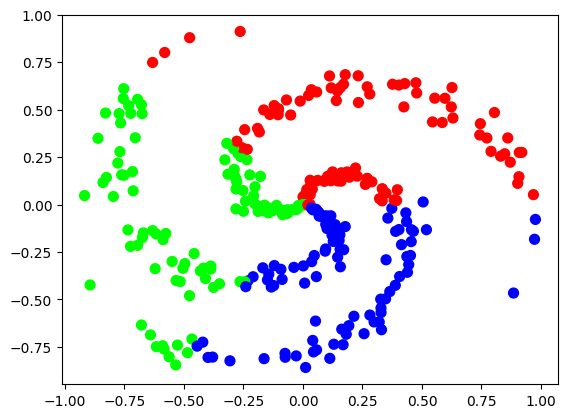

In [ ]:
plt.scatter(df["x1"], df["x2"], c=y_pred, s=50, cmap=plt.cm.brg)
plt.show()

###Can Non-linear Models help ?

#### What do we need to do to make Log. Reg powerful ?

**Task 1:** Automate complex feature creation

**Task 2:** Make it adaptive for multi-class classification

#### What if we had a model that did not need us to do manual feature engineering?

#### What if I tell you that this model performs very well for high dimensional data as well?

Let's see how Neural networks helps us in that procress.

Before jumping into it, let's see how NN are helping us in everyday lives

## NNs are changing our daily lives

#### What if I tell you that NN models powers pretty much every minute of your digital life?

If you want see how we use neural network in every task of our life, let's look at the epitome of AI: Google

#### How google Ads uses Neural Nets?

Google Ads make use of **Responsive Ads** to show relevent ads

- Suppose you are searching for "data science" or maybe Gradient Descent Algo on youtube
    - you'll start seeing "Scaler" ads.

- Similarly, if you looking for some "food recipies"
    - you'll start seeing "zomato" and "swiggy" ads.
    - or maybe grocery delivery apps ads below the video.

- Similarly, if you seach for "furniture store near me", google will put few top results as ads.

This all is done using Neural Nets.



<center><img src='https://drive.google.com/uc?id=1biF2pyzm9SQIUNqAs60mlox_P-N8LaAv' width="300"></center>










#### How Neural Nets help in data compression?

<center><img src='https://drive.google.com/uc?id=12TZO2QbRrLuyERPvHSUPc1tUTWEJfppA' width="800"></center>


With the introduction of "social media and streaming services", user "data generation has exploded" in recent years

- Storing all of this data for million of users is challenging part
- So, companies compress this data using Neural nets (Auto encoders - which we will see later) in order to store them.





#### How Neural Nets enhance the images ?
- Photos: Magic eraser

It uses image segmentation which helps isolating the pixels of objects which we want to remove from the image


<center><img src='https://drive.google.com/uc?id=15MCN3FXPBJTUkdjsN2rcvm0yKnUVd7jc' width="600"></center>





Here, each pixel will be classified/segmented into various classes

For example:
- all pixel belonging to water will be of class 0
- human will belong to class 1
- sand will belong to class 2 etc etc


This is known as image segmentation

<center><img src='https://drive.google.com/uc?id=1Z7hw0vCLDps-MSNh5HhAUH7YLq3d9NtV' width="800"></center>


#### How Neural Nets are used in Gmail ?
- Gmail: Smart Reply, Auto complete (NLP)



<center><img src='https://drive.google.com/uc?id=1bHcXbse5aECLQG1b-EKkB89AMP1y1HLy' width="600"></center>

## Inspiration from Biological Neuron

Lets now discuss how (and when) Neural Networks came into existence

### Understanding Neuron

Let's go back to 10th grade science subject. Recall how a biological neuron (i.e. the cell found in brain and spine) works in the human body.


![picture](https://drive.google.com/uc?export=view&id=1nNQlt0VjF3oMQs3KO8Z0djr_o4eHniT-)



- A neuron has a lot of connections with other neurons, through **dendrites**.
- These other neurons send electrical / electro-chemical signals via dendrites.
- The neuron **processes** these signals, and sends them ahead to more neurons, through **axons**.


- Some **dendrites are thicker** than the others
- meaning some inputs are more important than the others.




This mechanism of biological neurons, gave the basic inspiration for scientists to come up with the idea of creating **Artificial Neurons**, which led to the creation of the concept: **Neural Networks**.

<br>


### ANN (Artificial Neural Network)


#### What inspiration can we take from biological neuron?




In simple terms, we understood that
- Neuron takes input(s)
- and peform some computations.
- Ultimately, it fires/passes the output to further neurons.

For example: Let's say there a **biological neuron whose job is to decide whether to touch an object or not**



We'll get input from eyes in form of electro chemical signals.

Suppose the inputs are:
- Object's dimensions
- probable temperature
- known object or unknown

Notice that these inputs are nothing but features in our machine learning.




<img src='https://drive.google.com/uc?id=1RvsvX9jZTIhFF_2mhQnJRQTqaUscSeB-' width="700">


One of the feature here is **whether the object is known or not?**

#### Aren't we all conditioned from our childhood to not go near or touch unknown objects ?

**Did you notice the dendrite thickness for "known/ unknown object"**



Now, Imagine it is an known object (say, hot iron)

- Most of us (out of curiosity) have touched an hot iron.
- This may have been conditioned your brain (in other terms, build a neural path way) to be careful around iron or not to touch it from iron plate side or not to touch it all.

Hence, dendrite for temperature is thick.



We recognized that sensory inputs are nothing but your **features** in machine learning.

#### What does thickness of dendrites represent in machine learning terms ?

#### How can we represent a neuron mathematically ?


Consider an artificial neuron.
- It receives input feature: $x_1, x_2, x_3$


- Every input has a **weight** associated with it: $ w_1, w_2, w_3$
 - These weights are multiplied by the input values, thereby telling us how important a given input is to the neuron.
 - This is very similar to the linear model we've studied
- Processes the inputs by taking weighted sum. Also, a **bias term** is added.
 - The net input becomes: $w_1x_1 + w_2x_2 + w_3x_3 + b = z$ (let)
- There is a function, called as **activation function** $f$, which is associated with a neuron
 - The neuron applies this function on the net input value: $f(z) = f(w_1x_1 + w_2x_2 + w_3x_3 + b)$
- The result of this function becomes the **output** $o_1 = f(z)$
 - This output is then forwarded to other neurons.





![picture](https://drive.google.com/uc?export=view&id=11o_HlmuaWDtPJzWPR-lgKSnOPaDpo3Eb)

<br>

Based on this work flow, you can see, that it is loosely based on the working of a biologial neuron.





### Terminology

#### Question: What if the activation function of the neuron is sigmoid ?

---

### Logistic Regression as a NN

#### Question: Doesn't the formulation look familiar?

If you look carefully, you will realise that **logistic regression** had the same formulation.




### Representing Logistic Regression as a neuron




<br>

Notice that, there are two parts to the computation
- First is calculating the weighted sum of inputs
- followed by sigmoid

Diagrammatically, it can be shown as:-




<center><img src='https://drive.google.com/uc?id=1RaCCkTB_ek0DMgUIvWn_lI0-9uFHNWiA' width="700"></center>

<br>




In a logistic regression NN model output is computed in 2 steps:-
- Linear computation $z = w_1x_1 + w_2x_2 + ... + w_dx_d + b$
- Activation function: $o_i = f(z) = sigmoid(z)$

It combines the two operations of LogReg: linear combination followed by non-linearity (due to sigmoid).

This is known as a **Logistic Regression Unit (LRU).**




Moving from input to output in neural network is called as **forward propagation**
- In forward propagation, we calculate the predicted value and loss.

#### Representing neuron with 2 inputs

Since our dataset has 2 input features, let's represent a LRU with 2 feature input

<center><img src='https://drive.google.com/uc?id=1g7Ru0EIDzJphXgw7FfVBP1XfWX_td86R' width="700"></center>




We can write a neuron as

**Neuron = Linear + Activation**

where linear represent the additive mul of inputs and weights (wx + b)


## Brief history of Artificial Neural Networks

![picture](https://drive.google.com/uc?export=view&id=1zmXhs8FFFZ304skE9el_29NXQNbPCj3N)



**We don't have a single neuron, do we ?**
- typical brain has a network on neuron


So, researchers tried looking for ways to mimic this complex network of neuron.

<center><img src='https://drive.google.com/uc?id=1B0STJ-YB9m8ZhIZfWP-QubRZ01Ikr_sk' width="700"></center>

But as researches tried increases the complexity of network
- the network didn't perform well.
- They weren't able to train complex networks.

This put the whole area in deep freeze for a decade or so till Backpropagation method of training was developed by Geoff Hinton in 1986



#### How NN fare against classical ML (based on training data) ?

Let's understand it using a plot

<center><img src='https://drive.google.com/uc?id=1nAEi54cPQM8H2046tHeK-UDsupw7dtBP' width="700"></center>

Source: Andrew Ng

Notice that,
- when the training dataset is small,
    - classical ML models and NN models performance are quite similar
- But as the size of training set increases,
    - NN models starts outperforming classical ML
- With large datasets (million datapoints),
    - you can even train deep NN

So, **Data is the key when it comes to deep learning**

### Neural Network to the rescue

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', max_iter=5000, alpha=0, hidden_layer_sizes=(4, 3), random_state=1)
#clf = MLPClassifier(solver='adam', max_iter=10000, learning_rate='invscaling', alpha=0, hidden_layer_sizes=(4, 3), random_state=1)
clf.fit(X, y)
y_pred = clf.predict(X)

print(classification_report(y, y_pred, target_names=target_names, digits=2))

              precision    recall  f1-score   support

     class 0       1.00      0.99      0.99       100
     class 1       0.97      1.00      0.99       100
     class 2       1.00      0.98      0.99       100

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



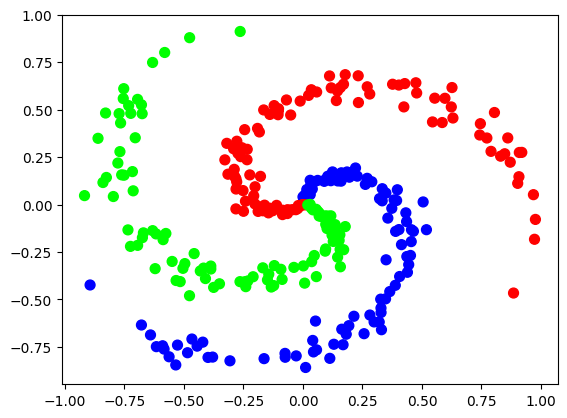

In [ ]:
plt.scatter(df["x1"], df["x2"], c=y_pred, s=50, cmap=plt.cm.brg)
plt.show()

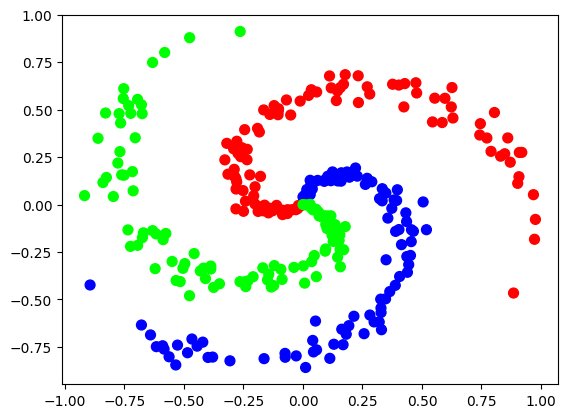

In [ ]:
plt.scatter(df["x1"], df["x2"], c=df["y"], s=50, cmap=plt.cm.brg)
plt.show()